In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import warnings
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

df = pd.read_csv('heart_disease.csv')

# Age and Habits

Regular exercise is a key habit in preventing heart disease. The saying goes that your habits in your 20s determine your health in your 30s, Your habits in your 30s determine your health in your 40s etc. The habits that these graphs will take a look at are exercise, alcohol Consumption, sugar Consumption, and stress. 

For each of the following four graphs, the X axis is made up of 2 ordinal attributes. 

The first attribute is age. Because the age attribute ranges from 18-70+, the age will be redefined as 18&19, 20s, 30s, 40s, 50s, 60s, and 70+. 

The 2nd attribute is habit. Below are 4 graphs for the 4 habits that come with our dataset. each habit is is split into "low," "medium," and "high." For each of the age group there will be 3 bars, each of those bars representing low, medium, and high for each specific age group.

As mentioned "20s determine your health in your 30s..." the purpose of this graph is to see how these habits truly impact heart disease as someone gets older.

/var/folders/dd/r7y_r9l9265bts06z2ggjtj40000gn/T/ipykernel_1242/4162367135.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



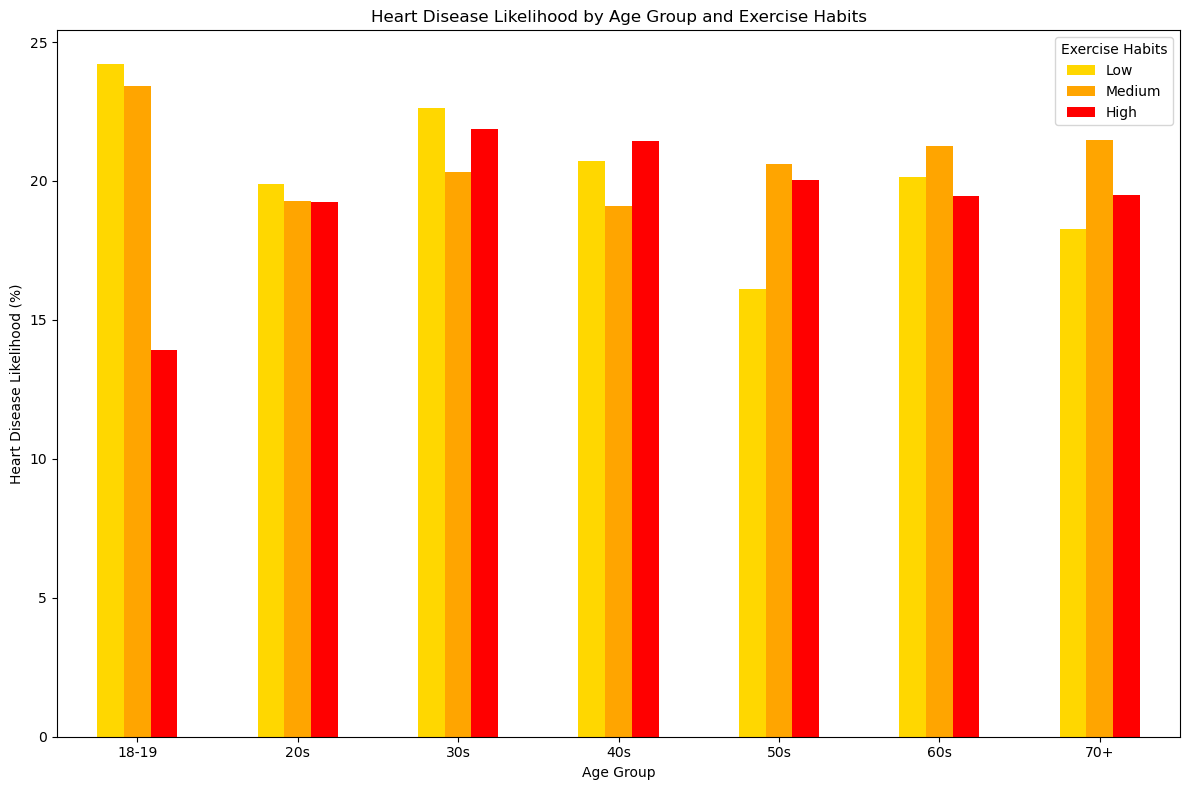

In [ ]:
# Redefine and and create age groups
bins = [17, 19, 29, 39, 49, 59, 69, df['Age'].max()]
labels = ['18-19', '20s', '30s', '40s', '50s', '60s', '70+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# group data by age group and exercise habits and calculate heart disease likelihood per group (%)
grouped = df.groupby(['Age_Group', 'Exercise Habits'])['Heart Disease Status'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index(name='Heart Disease Likelihood')

# create a pivot table for plotting
age_order = ['18-19', '20s', '30s', '40s', '50s', '60s', '70+']
pivot_df = grouped.pivot(index='Age_Group', columns='Exercise Habits', values='Heart Disease Likelihood')
pivot_df = pivot_df.reindex(age_order)

# Plotting the pivot table
pivot_df[['Low', 'Medium', 'High']  ].plot(kind='bar', figsize=(12, 8),color=['gold', 'orange', 'red'])
plt.title('Heart Disease Likelihood by Age Group and Exercise Habits')
plt.xlabel('Age Group')
plt.ylabel('Heart Disease Likelihood (%)')
plt.xticks(rotation=0)
plt.legend(title='Exercise Habits')
plt.tight_layout()
plt.show()


/var/folders/dd/r7y_r9l9265bts06z2ggjtj40000gn/T/ipykernel_1242/3172210035.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



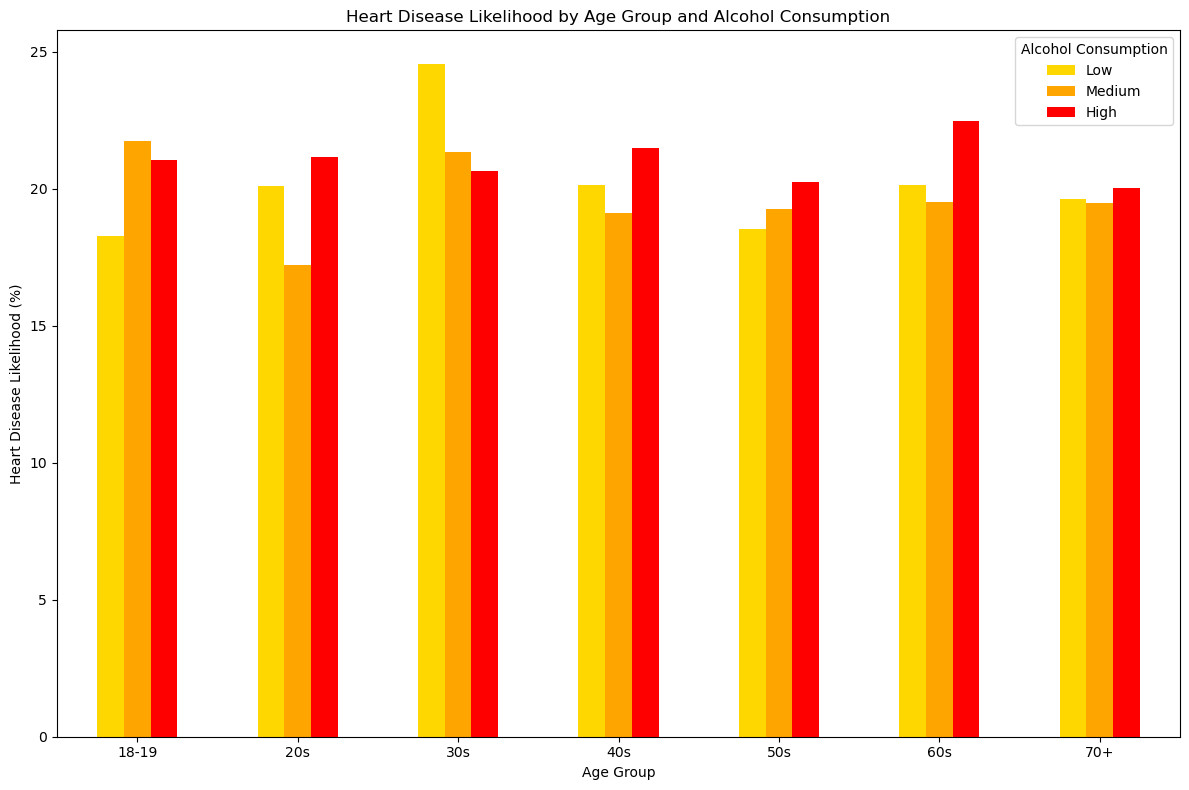

In [52]:
# group data by age group and exercise habits and calculate heart disease likelihood per group (%)
grouped = df.groupby(['Age_Group', 'Alcohol Consumption'])['Heart Disease Status'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index(name='Heart Disease Likelihood')

# create a pivot table for plotting
age_order = ['18-19', '20s', '30s', '40s', '50s', '60s', '70+']
pivot_df = grouped.pivot(index='Age_Group', columns='Alcohol Consumption', values='Heart Disease Likelihood')
pivot_df = pivot_df.reindex(age_order)

# Plotting the pivot table
pivot_df[['Low', 'Medium', 'High']  ].plot(kind='bar', figsize=(12, 8),color=['gold', 'orange', 'red'])
plt.title('Heart Disease Likelihood by Age Group and Alcohol Consumption')
plt.xlabel('Age Group')
plt.ylabel('Heart Disease Likelihood (%)')
plt.xticks(rotation=0)
plt.legend(title='Alcohol Consumption')
plt.tight_layout()
plt.show()

/var/folders/dd/r7y_r9l9265bts06z2ggjtj40000gn/T/ipykernel_1242/884773645.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



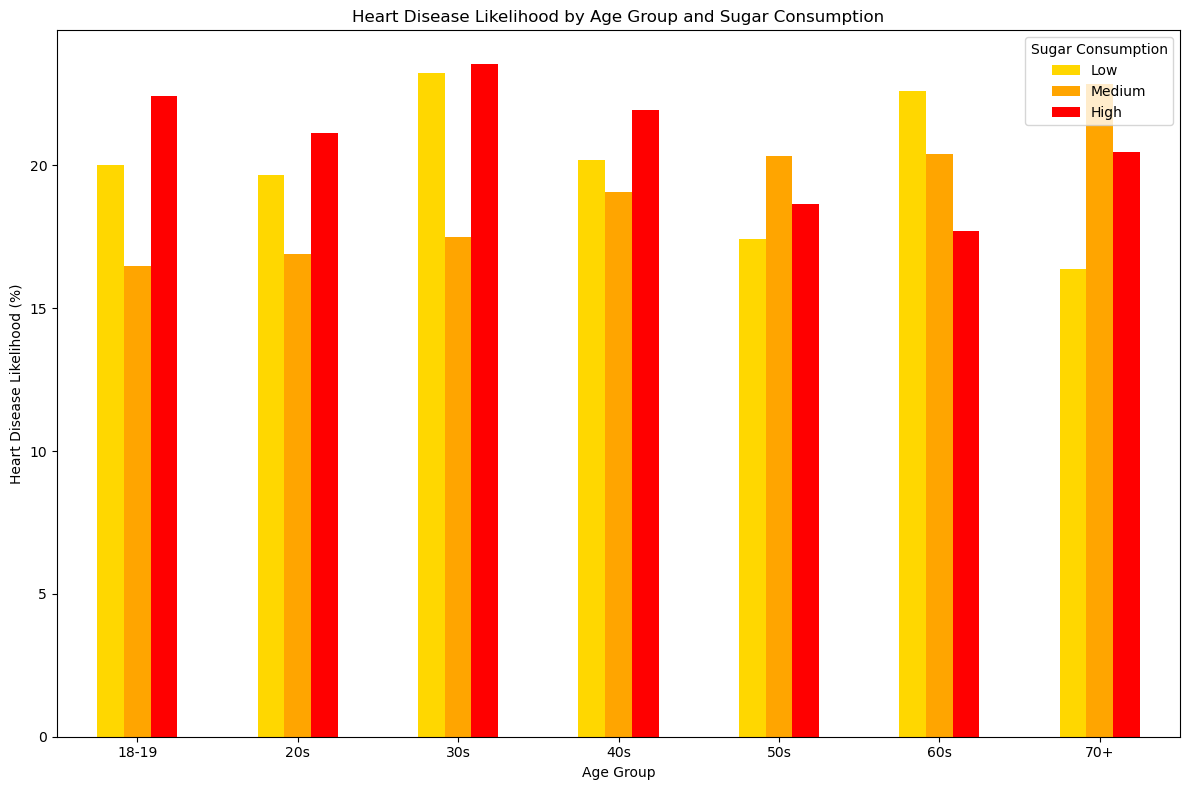

In [59]:
# group data by age group and exercise habits and calculate heart disease likelihood per group (%)
grouped = df.groupby(['Age_Group', 'Sugar Consumption'])['Heart Disease Status'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index(name='Heart Disease Likelihood')

# create a pivot table for plotting
age_order = ['18-19', '20s', '30s', '40s', '50s', '60s', '70+']
pivot_df = grouped.pivot(index='Age_Group', columns='Sugar Consumption', values='Heart Disease Likelihood')
pivot_df = pivot_df.reindex(age_order)

# Plotting the pivot table
pivot_df[['Low', 'Medium', 'High']  ].plot(kind='bar', figsize=(12, 8),color=['gold', 'orange', 'red'])
plt.title('Heart Disease Likelihood by Age Group and Sugar Consumption')
plt.xlabel('Age Group')
plt.ylabel('Heart Disease Likelihood (%)')
plt.xticks(rotation=0)
plt.legend(title='Sugar Consumption')
plt.tight_layout()
plt.show()

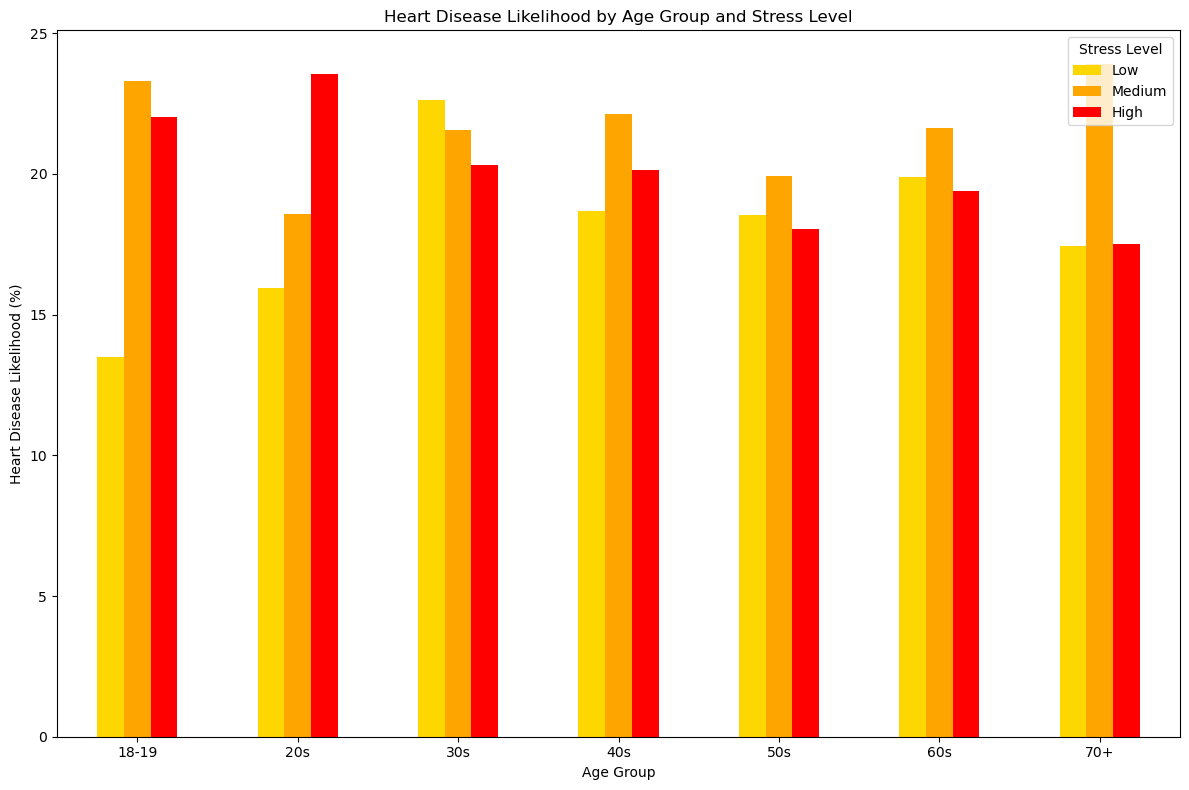

In [62]:
# group data by age group and exercise habits and calculate heart disease likelihood per group (%)
grouped = df.groupby(['Age_Group', 'Stress Level'])['Heart Disease Status'].apply(
    lambda x: (x == 'Yes').mean() * 100
).reset_index(name='Heart Disease Likelihood')

# create a pivot table for plotting
age_order = ['18-19', '20s', '30s', '40s', '50s', '60s', '70+']
pivot_df = grouped.pivot(index='Age_Group', columns='Stress Level', values='Heart Disease Likelihood')
pivot_df = pivot_df.reindex(age_order)

# Plotting the pivot table
pivot_df[['Low', 'Medium', 'High']  ].plot(kind='bar', figsize=(12, 8),color=['gold', 'orange', 'red'])
plt.title('Heart Disease Likelihood by Age Group and Stress Level')
plt.xlabel('Age Group')
plt.ylabel('Heart Disease Likelihood (%)')
plt.xticks(rotation=0)
plt.legend(title='Stress Level')
plt.tight_layout()
plt.show()

# Cholesterol and Alcohol

Cholesterol levels is an important factor in preventing heart disease, and even more important to manage if you do have a heart disease. The following graph examines the relationship between an ordinal, quantitative, and categorical attribute (alcohol intake, cholesterol levels, and heart disease status.) 

With a box chart, the graph gives us a distributed view on cholesterol levels with combined attributes of Alcohol Consumption (Low, Medium, and High), and individuals with heart disease. Each group/box on the x-axis represents one of these combinations for a total of six (e.g. low alcohol consumption and no heart disease, medium alcohol consumption with heart disease) while the y-axis shows the cholesterol level for individuals in each group. 

The goal is to show how alcohol levels affect cholesterol levels, and to get a potential view into how people with and without heart disease differ when managing their cholesterol levels.


/var/folders/dd/r7y_r9l9265bts06z2ggjtj40000gn/T/ipykernel_1242/941703942.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dd/r7y_r9l9265bts06z2ggjtj40000gn/T/ipykernel_1242/941703942.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




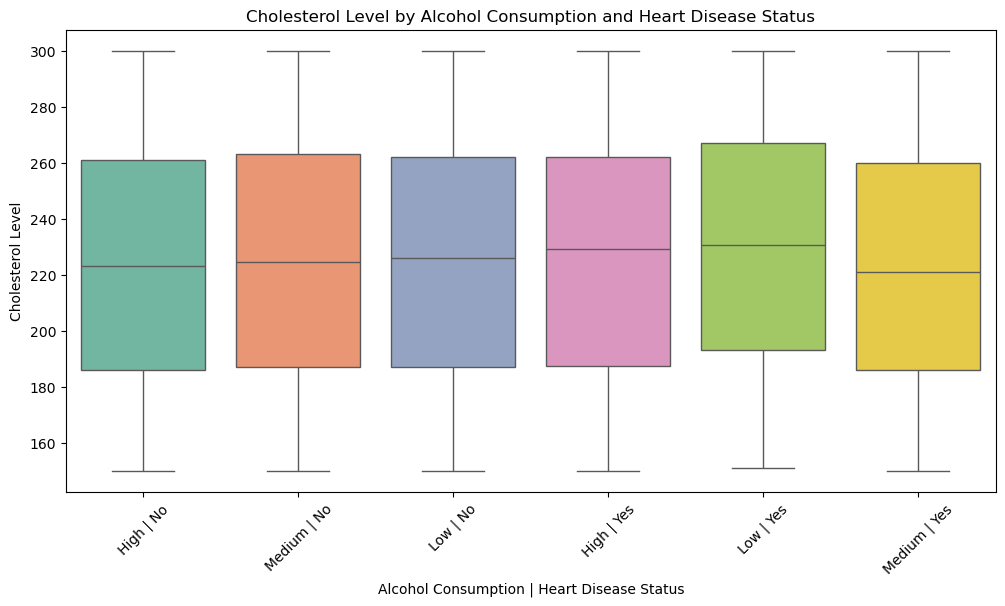

In [ ]:
# Filtering and plotting cholesterol levels by alcohol consumption and heart disease status
filtered_df = df[['Cholesterol Level', 'Alcohol Consumption', 'Heart Disease Status']]

# Create a new column for grouping
filtered_df['Grouped_Alc'] = filtered_df['Alcohol Consumption'] + ' | ' + filtered_df['Heart Disease Status']

# Plotting the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grouped_Alc', y='Cholesterol Level', data=filtered_df, palette='Set2')
plt.title('Cholesterol Level by Alcohol Consumption and Heart Disease Status')
plt.xlabel('Alcohol Consumption | Heart Disease Status')
plt.ylabel('Cholesterol Level')
plt.xticks(rotation=45)
plt.show()

# Cholesterol, Triglyceride  

Just as cholesterol levels can lead to heart disease, Triglyceride levels also impact heart disease. of course, managing it is important for those who already have heart diseases. 

the following 3D surface plots provide an interactive view between two categorical attributes, and one ordinal attribute (triglyceride levels x-axis, cholesterol levels y-axis, age z-axis) one being for those who already have a heart disease and another for those who don't.

The purpose of this graph is to get an is to once again, get an insight into how different age groups manage their cholesterol and triglyceride levels, and to get an insight into how having heart changes the way people go about their diet.

In [74]:
heart_disease_df = df[df['Heart Disease Status'] == 'Yes']
subset = heart_disease_df[['Age', 'Cholesterol Level', 'Triglyceride Level']].dropna()

Z = subset['Age']
Y = subset['Cholesterol Level']
X = subset['Triglyceride Level']

x_line = np.linspace(X.min(), X.max(), 20)
y_line = np.linspace(Y.min(), Y.max(), 20)
x_line, y_line = np.meshgrid(x_line, y_line)
z_line = griddata((X,Y), Z, (x_line, y_line), method='linear')


fig = go.Figure(data=[go.Surface(z=z_line, x=x_line, y=y_line, colorscale='Viridis')])
fig.update_layout(
    title='Cholesterol Level vs Age vs Triglyceride of those with Heart Disease',
                  scene=dict(
                      xaxis_title='Triglyceride Level', 
                      yaxis_title='Cholesterol Level', 
                      zaxis_title='Age'),
                  width=800, height=600)

fig.show()

In [ ]:
heart_disease_df = df[df['Heart Disease Status'] == 'No']
subset = heart_disease_df[['Age', 'Cholesterol Level', 'Triglyceride Level']].dropna()

Z = subset['Age']
Y = subset['Cholesterol Level']
X = subset['Triglyceride Level']

x_line = np.linspace(X.min(), X.max(), 20)
y_line = np.linspace(Y.min(), Y.max(), 20)
x_line, y_line = np.meshgrid(x_line, y_line)
z_line = griddata((X,Y), Z, (x_line, y_line), method='linear')


fig = go.Figure(data=[go.Surface(z=z_line, x=x_line, y=y_line, colorscale='Viridis')])
fig.update_layout(
    title='Cholesterol Level vs Age vs Triglyceride of those without Heart Disease',
                  scene=dict(
                      xaxis_title='Triglyceride Level', 
                      yaxis_title='Cholesterol Level', 
                      zaxis_title='Age'),
                  width=800, height=600)

fig.show()